In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('logistic_regression_docs').getOrCreate()

# If you're getting an error with numpy, please type 'sudo pip install numpy --user' into the EC2 console.
from pyspark.ml.classification import LogisticRegression

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/04 21:44:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# Use Spark to read in the Ecommerce Customers csv file. You can infer csv schemas. 
df = (spark.read
      .option("multiline", "true")
      .option("quote", '"')
      .option("header", "true")
      .option("escape", "\\")
      .option("escape", '"')
      .csv('data_unprocessed_2017_2018.csv')
)

In [3]:
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- age: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- country_live: string (nullable = true)
 |-- country_work: string (nullable = true)
 |-- race: string (nullable = true)
 |-- self_employed: string (nullable = true)
 |-- num_employees: string (nullable = true)
 |-- tech_company: string (nullable = true)
 |-- tech_role: string (nullable = true)
 |-- benefits: string (nullable = true)
 |-- care_options: string (nullable = true)
 |-- wellness_program: string (nullable = true)
 |-- seek_help_resources: string (nullable = true)
 |-- anonymity: string (nullable = true)
 |-- leave_difficulty: string (nullable = true)
 |-- phys_vs_mental: string (nullable = true)
 |-- supervisor_willingness: string (nullable = true)
 |-- supervisor_experience: string (nullable = true)
 |-- supervisor_description: string (nullable = true)
 |-- coworkers_willingness: string (nullable = true)
 |-- coworkers_experience: string (nullable = true)
 |-- 

In [4]:
df.head()

22/10/04 21:44:07 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


Row(ID='0', age='27', gender='Female', country_live='United Kingdom', country_work='United Kingdom', race='I prefer not to answer', self_employed='0', num_employees='100-500', tech_company='1', tech_role='1', benefits='No', care_options='Yes', wellness_program='No', seek_help_resources="I don't know", anonymity="I don't know", leave_difficulty="I don't know", phys_vs_mental='Same level of comfort for each', supervisor_willingness='Yes', supervisor_experience='0', supervisor_description=None, coworkers_willingness='Yes', coworkers_experience='1', coworkers_description='Spoke about my anxiety they were very supportive', phys_health_importance='6', mental_health_importance='0', mental_health_coverage=None, tell_others_experience=None, tell_others_consequence=None, scope_productivity=None, prev_employer='1', prev_tech_company='0', prev_benefits="I don't know", prev_care_options='N/A (was not aware)', prev_wellness_program='Some did', prev_seek_help_resources='Some did', prev_anonymity='Yes

In [5]:
for item in df.head():
    print(item)

0
27
Female
United Kingdom
United Kingdom
I prefer not to answer
0
100-500
1
1
No
Yes
No
I don't know
I don't know
I don't know
Same level of comfort for each
Yes
0
None
Yes
1
Spoke about my anxiety they were very supportive
6
0
None
None
None
None
1
0
I don't know
N/A (was not aware)
Some did
Some did
Yes, always
Physical health
Yes, all of my previous supervisors
0
None
No, at none of my previous employers
0
None
3
3
Possibly
None
Possibly
1
No
Sometimes
No
5
Yes
None
No
I'd be worried they wouldn't hire me 
0
10
Yes, I experienced
None
Yes, I experienced
None
1


In [6]:
from pyspark.sql.functions import col, avg
df.select(avg('age')).collect()

[Row(avg(age)=35.375)]

In [7]:
df.select('gender').distinct().collect()

[Row(gender='female (cisgender)'),
 Row(gender='femalw'),
 Row(gender='Cis-Female'),
 Row(gender='transgender'),
 Row(gender='cis-male'),
 Row(gender='genderfluid'),
 Row(gender='My sex is female.'),
 Row(gender='non-binary'),
 Row(gender='F'),
 Row(gender='None'),
 Row(gender='Genderqueer'),
 Row(gender='Demiguy'),
 Row(gender='God King of the Valajar'),
 Row(gender='man'),
 Row(gender='none'),
 Row(gender='Man'),
 Row(gender='gender non-conforming woman'),
 Row(gender='Cis male'),
 Row(gender='Female '),
 Row(gender='m'),
 Row(gender=None),
 Row(gender='Agender'),
 Row(gender='Male (cis)'),
 Row(gender='f'),
 Row(gender='dude'),
 Row(gender='woman'),
 Row(gender='Cis woman'),
 Row(gender='Female'),
 Row(gender='Cisgender male'),
 Row(gender='Cis female '),
 Row(gender='Male (or female, or both)'),
 Row(gender='cis-Female'),
 Row(gender='female'),
 Row(gender='Agender/genderfluid'),
 Row(gender='trans woman'),
 Row(gender='M'),
 Row(gender='SWM'),
 Row(gender='Woman-identified'),
 Row

In [8]:
df.columns

['ID',
 'age',
 'gender',
 'country_live',
 'country_work',
 'race',
 'self_employed',
 'num_employees',
 'tech_company',
 'tech_role',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help_resources',
 'anonymity',
 'leave_difficulty',
 'phys_vs_mental',
 'supervisor_willingness',
 'supervisor_experience',
 'supervisor_description',
 'coworkers_willingness',
 'coworkers_experience',
 'coworkers_description',
 'phys_health_importance',
 'mental_health_importance',
 'mental_health_coverage',
 'tell_others_experience',
 'tell_others_consequence',
 'scope_productivity',
 'prev_employer',
 'prev_tech_company',
 'prev_benefits',
 'prev_care_options',
 'prev_wellness_program',
 'prev_seek_help_resources',
 'prev_anonymity',
 'prev_phys_vs_mental',
 'prev_supervisor_willingness',
 'prev_supervisor_experience',
 'prev_supervisor_description',
 'prev_coworkers_willingness',
 'prev_coworkers_experience',
 'prev_coworkers_description',
 'prev_phys_health_importance',
 'prev_mental_health

In [9]:
df.select('prev_coworkers_description').distinct().collect()

[Row(prev_coworkers_description="Sorry, don't remember re: co-workers (2001 & before)"),
 Row(prev_coworkers_description='Mental health conversations were a normal part of work chatter. Everyone tried to give space and consideration for each other.'),
 Row(prev_coworkers_description="It's hard to me writing this kind of stuff. All of this still causes me a lot of damage. It's hard..."),
 Row(prev_coworkers_description="Almost every time I shared my mental issues with other developers, they had similar experiences, so it was actually comforting to know that I wasn't alone."),
 Row(prev_coworkers_description='I had a coworker at a previous job who was very supportive of substance abuse treatment discussions.'),
 Row(prev_coworkers_description='i told one of my previous coworkers about my diagnosis.  we are still friends'),
 Row(prev_coworkers_description="I've brought up my depression with previous cowokers, and it's been generally accepted."),
 Row(prev_coworkers_description='See my ans

In [10]:
print((df.count(), len(df.columns)))

(1178, 64)


In [11]:
null_count = {col:df.filter(df[col].isNull()).count() for col in df.columns}
null_count

{'ID': 0,
 'age': 2,
 'gender': 16,
 'country_live': 2,
 'country_work': 2,
 'race': 0,
 'self_employed': 0,
 'num_employees': 169,
 'tech_company': 169,
 'tech_role': 169,
 'benefits': 169,
 'care_options': 273,
 'wellness_program': 169,
 'seek_help_resources': 169,
 'anonymity': 169,
 'leave_difficulty': 169,
 'phys_vs_mental': 169,
 'supervisor_willingness': 169,
 'supervisor_experience': 169,
 'supervisor_description': 909,
 'coworkers_willingness': 169,
 'coworkers_experience': 170,
 'coworkers_description': 844,
 'phys_health_importance': 169,
 'mental_health_importance': 169,
 'mental_health_coverage': 1009,
 'tell_others_experience': 1009,
 'tell_others_consequence': 1009,
 'scope_productivity': 1009,
 'prev_employer': 0,
 'prev_tech_company': 143,
 'prev_benefits': 143,
 'prev_care_options': 143,
 'prev_wellness_program': 143,
 'prev_seek_help_resources': 143,
 'prev_anonymity': 143,
 'prev_phys_vs_mental': 143,
 'prev_supervisor_willingness': 143,
 'prev_supervisor_experience

## 2.2 Data Exploration

In [12]:
from pyspark.sql.functions import *
from pyspark import SparkContext
from pyspark.sql import SQLContext
from functools import reduce
import pyspark.sql.functions as F
import pandas as pd
import numpy as np
summary = df.describe().filter("summary = 'count'")
columns = df.columns
counts  = df.count()

summary.rdd \
  .flatMap(lambda row: map(lambda i: (columns[i-1], row[i]), range(1, len(row)))) \
  .toDF(['column', 'count']) \
  .withColumn('not_null_ratio', col('count') / counts * 100) \
.sort(desc("not_null_ratio"))\
  .show(100, False)



+-----------------------------+-----+------------------+
|column                       |count|not_null_ratio    |
+-----------------------------+-----+------------------+
|race                         |1178 |100.0             |
|prev_employer                |1178 |100.0             |
|friends_fam_willingness      |1178 |100.0             |
|phys_interview               |1178 |100.0             |
|mh_disorder                  |1178 |100.0             |
|mental_interview             |1178 |100.0             |
|mh_treatment                 |1178 |100.0             |
|ID                           |1178 |100.0             |
|self_employed                |1178 |100.0             |
|mh_family_history            |1178 |100.0             |
|work_interfere_treated       |1178 |100.0             |
|witness_unsupportive         |1176 |99.830220713073   |
|witness_supportive           |1176 |99.830220713073   |
|tech_ind_support             |1176 |99.830220713073   |
|team_reaction                |

In [13]:
from pyspark.sql.types import IntegerType
df = df.withColumn("age", df["age"].cast(IntegerType()))

#data_df = df.withColumn("age", data_df["age"].cast(IntegerType()))

In [14]:
df.describe('age').show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              1176|
|   mean|            35.375|
| stddev|10.366542951531986|
|    min|                18|
|    max|               139|
+-------+------------------+



## 2.3 Exploratory data analysis

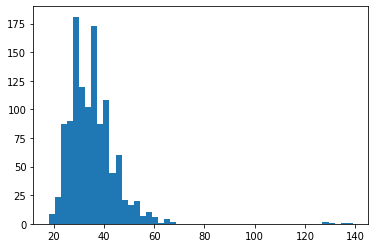

In [15]:
# Import the relevant Python libraries.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


age = np.array(df.filter('age > 0').select('age').collect())
plt.hist(age, bins =50)
plt.show()

In [16]:
df_filter1 = df.filter('age < 100')
print((df_filter1.count(), len(df_filter1.columns)))

(1171, 64)


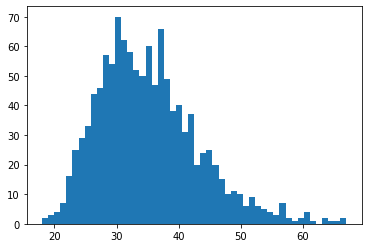

In [17]:
age = np.array(df_filter1.select('age').collect())
plt.hist(age, bins =50)
plt.show()

In [18]:
df_filter1 =  df_filter1.withColumn("gender",F.lower(F.col("gender")))

df_filter1.select('gender').distinct().collect()

[Row(gender='female (cisgender)'),
 Row(gender='femalw'),
 Row(gender='transgender'),
 Row(gender='female (cis) '),
 Row(gender='nb'),
 Row(gender='cis-male'),
 Row(gender='genderfluid'),
 Row(gender='non-binary'),
 Row(gender='female-ish'),
 Row(gender='she/her/they/them'),
 Row(gender='woman-identified'),
 Row(gender='genderqueer demigirl'),
 Row(gender='man'),
 Row(gender='none'),
 Row(gender='gender non-conforming woman'),
 Row(gender='genderqueer'),
 Row(gender='m'),
 Row(gender='transfeminine'),
 Row(gender=None),
 Row(gender='male, cis'),
 Row(gender='malel'),
 Row(gender='f'),
 Row(gender='trans female'),
 Row(gender='dude'),
 Row(gender='woman'),
 Row(gender='cisgendered woman'),
 Row(gender='female'),
 Row(gender='trans woman'),
 Row(gender='other'),
 Row(gender='non binary'),
 Row(gender='agender/genderfluid'),
 Row(gender='male-ish'),
 Row(gender='male '),
 Row(gender='cis female '),
 Row(gender='femail'),
 Row(gender='i identify as female'),
 Row(gender='cis hetero male'),

In [19]:
df_filter1.select('gender').distinct().collect()

[Row(gender='female (cisgender)'),
 Row(gender='femalw'),
 Row(gender='transgender'),
 Row(gender='female (cis) '),
 Row(gender='nb'),
 Row(gender='cis-male'),
 Row(gender='genderfluid'),
 Row(gender='non-binary'),
 Row(gender='female-ish'),
 Row(gender='she/her/they/them'),
 Row(gender='woman-identified'),
 Row(gender='genderqueer demigirl'),
 Row(gender='man'),
 Row(gender='none'),
 Row(gender='gender non-conforming woman'),
 Row(gender='genderqueer'),
 Row(gender='m'),
 Row(gender='transfeminine'),
 Row(gender=None),
 Row(gender='male, cis'),
 Row(gender='malel'),
 Row(gender='f'),
 Row(gender='trans female'),
 Row(gender='dude'),
 Row(gender='woman'),
 Row(gender='cisgendered woman'),
 Row(gender='female'),
 Row(gender='trans woman'),
 Row(gender='other'),
 Row(gender='non binary'),
 Row(gender='agender/genderfluid'),
 Row(gender='male-ish'),
 Row(gender='male '),
 Row(gender='cis female '),
 Row(gender='femail'),
 Row(gender='i identify as female'),
 Row(gender='cis hetero male'),

In [20]:
from pyspark.sql.functions import col, countDistinct

df_filter1.select(F.countDistinct("gender")).show()

+----------------------+
|count(DISTINCT gender)|
+----------------------+
|                    69|
+----------------------+



In [21]:
import pyspark.sql.functions as F

df_filter1 =  df_filter1.withColumn("gender",F.lower(F.col("gender")))

female_list = ['female', 'f','female ', 'femalw', 'femail', 'female (cis)', 'female (cis) ','cis female ',
                            'my sex is female.', 'female (cisgender)', 'woman-identified', 'cis-female', 
                            'cis female', 'f, cisgender', 'female-ish', 'trans woman', 'i identify as female',
                            '*shrug emoji* (f)', 'cis woman', 'cisgendered woman', 'trans female', 'woman',
                            'cisgender female']

male_list = ['m', 'man', 'cis-male', 'mail', 'male/androgynous ','cis hetero male', 
                            'male (cis)','male (hey this is the tech industry you\'re talking about)',
                            'god king of the valajar', 'cis male', 'male ', 'male, cis', 'cis male ',
                            'male-ish','dude','ostensibly male','male, born with xy chromosoms','malel', 
                            'trans man','cisgender male', 'swm', 'male']

from pyspark.sql.functions import when

df_filter1 = df_filter1.withColumn('gender_new',
                                    when(col('gender').isin(female_list),'female')\
                                   .when(col('gender').isin(male_list),'male')\
                                   .otherwise('non-binary'))



In [22]:
df_filter1.groupBy('gender_new').count().show()

+----------+-----+
|gender_new|count|
+----------+-----+
|non-binary|   49|
|    female|  348|
|      male|  774|
+----------+-----+



In [23]:
df_male_mh = df_filter1.where(F.col('gender_new')=='male')

df_male_mh.groupBy('mh_treatment').count().show()

+------------+-----+
|mh_treatment|count|
+------------+-----+
|           0|  352|
|           1|  422|
+------------+-----+



In [24]:
df_female_mh = df_filter1.where(F.col('gender_new')=='female')

df_female_mh.groupBy('mh_treatment').count().show()

+------------+-----+
|mh_treatment|count|
+------------+-----+
|           0|   91|
|           1|  257|
+------------+-----+



<AxesSubplot:xlabel='gender_new'>

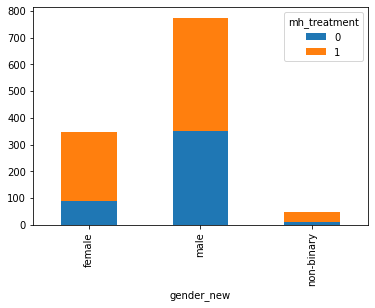

In [25]:
df_gender = df_filter1.groupby('mh_treatment','gender_new').count()
pdf_1 = df_gender.toPandas()
pdf_1.pivot( 'gender_new', 'mh_treatment','count').plot.bar(stacked=True)

In [26]:
df_family = df_filter1.groupby('mh_treatment','mh_family_history').count()
df_family.show()

+------------+-----------------+-----+
|mh_treatment|mh_family_history|count|
+------------+-----------------+-----+
|           0|     I don't know|  104|
|           1|               No|  109|
|           0|               No|  229|
|           1|     I don't know|  184|
|           1|              Yes|  424|
|           0|              Yes|  121|
+------------+-----------------+-----+



In [27]:
pdf_1 = df_family.toPandas()

<AxesSubplot:xlabel='mh_family_history'>

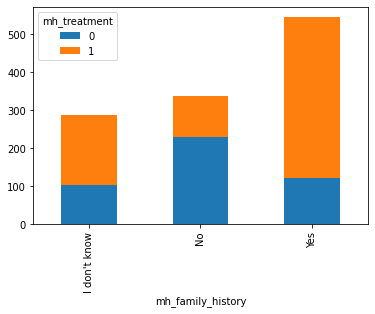

In [28]:
pdf_1.pivot( 'mh_family_history', 'mh_treatment','count').plot.bar(stacked=True)

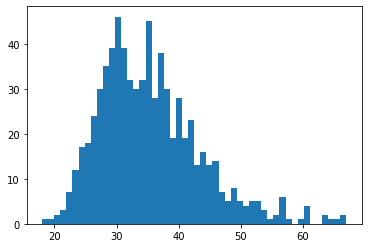

In [29]:
age_1 = np.array(df_filter1.filter('mh_treatment == 1').select('age').collect())
plt.hist(age_1, bins =50)
plt.show()

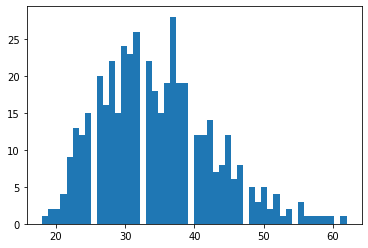

In [30]:
age_2 = np.array(df_filter1.filter('mh_treatment == 0').select('age').collect())
plt.hist(age_2, bins =50)
plt.show()

<AxesSubplot:>

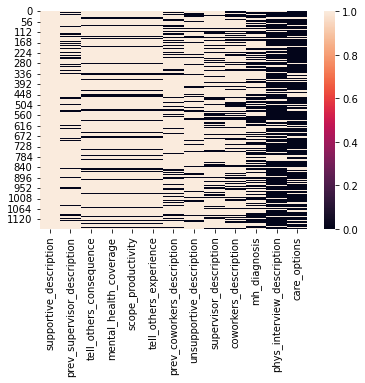

In [31]:
#checking missing values:
import seaborn as sns
missing_check_cols = ['supportive_description' , 'prev_supervisor_description', 'tell_others_consequence', 'mental_health_coverage','scope_productivity','tell_others_experience',        
'prev_coworkers_description','unsupportive_description','supervisor_description','coworkers_description','mh_diagnosis','phys_interview_description', 'care_options'] 
df_missing_high = df_filter1.select(*missing_check_cols)
plot_df = df_missing_high.toPandas()
sns.heatmap(data = plot_df.isna())  

In [32]:
#remove the columns with more than 70% missing values:
remove_cols_70_missing = ['supportive_description' , 'prev_supervisor_description', 'tell_others_consequence', 'mental_health_coverage','scope_productivity','tell_others_experience',        
'prev_coworkers_description','unsupportive_description','supervisor_description','coworkers_description']
df_filter1 = df_filter1.drop(*remove_cols_70_missing)
print((df_filter1.count(), len(df_filter1.columns)))

(1171, 55)


In [33]:
#remove rows with unreasonable values and null values for age:
df_filter1 = df_filter1.na.drop(subset = ['age'])
df_filter1 = df_filter1.filter('age < 100')
print((df_filter1.count(), len(df_filter1.columns)))

(1171, 55)


In [34]:
#check the race column:
df_filter1.groupBy('race').count().show()

+--------------------+-----+
|                race|count|
+--------------------+-----+
|             Persian|    1|
|              Indian|    1|
|  Hispanic or Latino|   10|
|         South Asian|    2|
|         West Indian|    1|
|More than one of ...|   27|
|   European American|    1|
|              Jewish|    1|
|      Indo-Caribbean|    1|
|   mexican american |    1|
|I prefer not to a...|  387|
|               White|  701|
|      Middle Eastern|    1|
|               Asian|   22|
|Black or African ...|   11|
|           Ashkenazi|    1|
|American Indian o...|    1|
|             Mestizo|    1|
+--------------------+-----+



In [35]:
df_filter1 = df_filter1.withColumn('race_new',
                                    when(col('race').isin(['White']),'white')\
                                   .when(col('race').isin(['I prefer not to answer']),'no_answer')\
                                   .otherwise('Others'))
df_filter1.groupBy('race_new').count().show()

+---------+-----+
| race_new|count|
+---------+-----+
|    white|  701|
|no_answer|  387|
|   Others|   83|
+---------+-----+



In [36]:
df_filter1.groupBy('self_employed').count().show()

+-------------+-----+
|self_employed|count|
+-------------+-----+
|            0| 1004|
|            1|  167|
+-------------+-----+



In [37]:
df_filter1.groupBy('self_employed', 'mh_treatment').count().show()

+-------------+------------+-----+
|self_employed|mh_treatment|count|
+-------------+------------+-----+
|            0|           1|  614|
|            1|           1|  103|
|            0|           0|  390|
|            1|           0|   64|
+-------------+------------+-----+



In [38]:
#remove rows with self-employed = 0:
df_filter1 = df_filter1.where(F.col('self_employed')== 0)
df_filter1 = df_filter1.drop('self_employed')
print((df_filter1.count(), len(df_filter1.columns)))

(1004, 55)


In [39]:
desc_cols = [col for col in df_filter1.columns if 'description' in col]
df_filter1 = df_filter1.drop(*desc_cols)
print((df_filter1.count(), len(df_filter1.columns)))

(1004, 53)


In [40]:
# remove unrelated columns or columns with same meaning the target variable:
same_target_col = [ 'mh_disorder', 'mh_diagnosis', 'mh_past','work_interfere_treated', 'experience_deterrence', 'friends_fam_willingness', 'phys_interview', 'mental_interview', 'do_people_know', 'team_reaction', 'witness_unsupportive',
       'witness_supportive', 'tech_ind_support','tech_company', 'tech_role']
df_filter1 = df_filter1.drop(*same_target_col)
print((df_filter1.count(), len(df_filter1.columns)))

(1004, 38)


In [41]:
df_filter1.groupBy('country_live').count().sort(desc("count")).show()


+--------------------+-----+
|        country_live|count|
+--------------------+-----+
|United States of ...|  736|
|      United Kingdom|   67|
|             Germany|   23|
|              Canada|   21|
|              France|   19|
|               Spain|   15|
|               India|   13|
|         Netherlands|   12|
|           Australia|   11|
|             Ireland|    6|
|         Switzerland|    6|
|              Mexico|    5|
|              Poland|    5|
|         New Zealand|    4|
|               Japan|    4|
|             Romania|    4|
|        South Africa|    4|
|              Russia|    3|
|             Finland|    3|
|               Italy|    3|
+--------------------+-----+
only showing top 20 rows



In [42]:
#treatment for the country_live and country_live:
df_filter1 = df_filter1.withColumn('country_live',
                                    when(col('country_live').isin(['United States of America']),'US')\
                                   .otherwise('outside_US'))
df_filter1.groupBy('country_live').count().show()

+------------+-----+
|country_live|count|
+------------+-----+
|  outside_US|  268|
|          US|  736|
+------------+-----+



In [43]:
#treatment for the country_live and country_work:
df_filter1 = df_filter1.withColumn('country_work',
                                    when(col('country_work').isin(['United States of America']),'US')\
                                   .otherwise('outside_US'))
df_filter1.groupBy('country_work').count().show()

+------------+-----+
|country_work|count|
+------------+-----+
|  outside_US|  265|
|          US|  739|
+------------+-----+



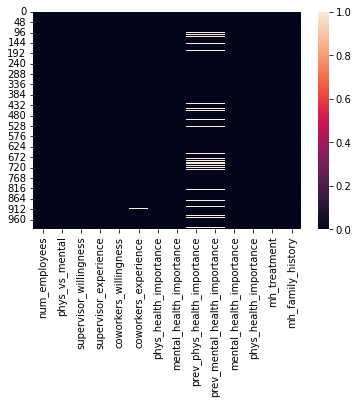

In [44]:
#checking the missing values again:
missing_check_cols = [ 'num_employees', 'phys_vs_mental',
                      'supervisor_willingness', 'supervisor_experience', 'coworkers_willingness', 'coworkers_experience',
                      'phys_health_importance', 'mental_health_importance',  'prev_phys_health_importance',
                      'prev_mental_health_importance','mental_health_importance', 'phys_health_importance','mh_treatment', 'mh_family_history']
df_missing_top = df_filter1.select(*missing_check_cols)
plot_df = df_missing_top.toPandas()
sns.heatmap(data = plot_df.isna());  

In [45]:
df_filter1.select(['prev_phys_health_importance','prev_mental_health_importance','mental_health_importance','phys_health_importance']).head(5)

[Row(prev_phys_health_importance='3', prev_mental_health_importance='3', mental_health_importance='0', phys_health_importance='6'),
 Row(prev_phys_health_importance='5', prev_mental_health_importance='2', mental_health_importance='2', phys_health_importance='7'),
 Row(prev_phys_health_importance='8', prev_mental_health_importance='0', mental_health_importance='1', phys_health_importance='0'),
 Row(prev_phys_health_importance=None, prev_mental_health_importance=None, mental_health_importance='5', phys_health_importance='7'),
 Row(prev_phys_health_importance='7', prev_mental_health_importance='3', mental_health_importance='5', phys_health_importance='9')]

In [46]:
def fill_null_with_mean(df, include=set()):

    stats = df.agg(*(avg(c).alias(c) for c in df.columns if c in include))
    return df.na.fill(stats.first().asDict())

df_filter1 = fill_null_with_mean(df_filter1, ['prev_phys_health_importance','prev_mental_health_importance','mental_health_importance','phys_health_importance'])
df_filter1.select(['prev_phys_health_importance','prev_mental_health_importance','mental_health_importance','phys_health_importance']).head(5)

[Row(prev_phys_health_importance='3', prev_mental_health_importance='3', mental_health_importance='0', phys_health_importance='6'),
 Row(prev_phys_health_importance='5', prev_mental_health_importance='2', mental_health_importance='2', phys_health_importance='7'),
 Row(prev_phys_health_importance='8', prev_mental_health_importance='0', mental_health_importance='1', phys_health_importance='0'),
 Row(prev_phys_health_importance='5.3744292237442925', prev_mental_health_importance='3.528538812785388', mental_health_importance='5', phys_health_importance='7'),
 Row(prev_phys_health_importance='7', prev_mental_health_importance='3', mental_health_importance='5', phys_health_importance='9')]

In [47]:
# check the values of the 'num_employee' column:
df_filter1.groupBy('num_employees').count().sort(desc("count")).show()

+--------------+-----+
| num_employees|count|
+--------------+-----+
|       100-500|  284|
|More than 1000|  263|
|        26-100|  198|
|        Jun-25|  155|
|      500-1000|   79|
|         1-May|   25|
+--------------+-----+



In [48]:
#treatment of the 'num_employee' column:

df_filter1 = df_filter1.withColumn('num_employees',
                                    when(col('num_employees').isin(['1-May']),'1-5')\
                                   .when(col('num_employees').isin(['Jun-25']),'6-25')
                                   .otherwise(col('num_employees')))
df_filter1.groupBy('num_employees').count().show()

+--------------+-----+
| num_employees|count|
+--------------+-----+
|       100-500|  284|
|      500-1000|   79|
|More than 1000|  263|
|        26-100|  198|
|           1-5|   25|
|          6-25|  155|
+--------------+-----+



In [49]:
df_filter1 = df_filter1.withColumn(
    'remote_work',
    F.when((F.col("country_live") != F.col("country_work")), 1)\
    .otherwise(0)
)
df_filter1.groupBy('remote_work').count().show()

+-----------+-----+
|remote_work|count|
+-----------+-----+
|          1|    3|
|          0| 1001|
+-----------+-----+



In [50]:
def categorizer(age):
    if age >=18 and age<=35:
        return "Young"
    elif age > 35 and age<=55:
        return "Middle_age"
    elif age > 55:
        return "Older"
    
bucket_udf = udf(categorizer, StringType() )
df_filter1 = df_filter1.withColumn("age_bucket", bucket_udf("age"))

In [51]:
df_filter1.groupBy('age_bucket').count().show()

+----------+-----+
|age_bucket|count|
+----------+-----+
|     Older|   17|
|Middle_age|  398|
|     Young|  589|
+----------+-----+



In [52]:
df_filter1.groupBy('age_bucket','mh_treatment').count().show()

+----------+------------+-----+
|age_bucket|mh_treatment|count|
+----------+------------+-----+
|Middle_age|           1|  241|
|     Older|           0|    4|
|Middle_age|           0|  157|
|     Older|           1|   13|
|     Young|           0|  229|
|     Young|           1|  360|
+----------+------------+-----+



In [53]:
df_filter1.groupBy('prev_employer').count().show()

+-------------+-----+
|prev_employer|count|
+-------------+-----+
|            0|  128|
|            1|  876|
+-------------+-----+



In [54]:
df_filter1.columns[0:15]

['ID',
 'age',
 'gender',
 'country_live',
 'country_work',
 'race',
 'num_employees',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help_resources',
 'anonymity',
 'leave_difficulty',
 'phys_vs_mental',
 'supervisor_willingness']

In [55]:
df_filter1.columns[0:1] + df_filter1.columns[15:]

['ID',
 'supervisor_experience',
 'coworkers_willingness',
 'coworkers_experience',
 'phys_health_importance',
 'mental_health_importance',
 'prev_employer',
 'prev_tech_company',
 'prev_benefits',
 'prev_care_options',
 'prev_wellness_program',
 'prev_seek_help_resources',
 'prev_anonymity',
 'prev_phys_vs_mental',
 'prev_supervisor_willingness',
 'prev_supervisor_experience',
 'prev_coworkers_willingness',
 'prev_coworkers_experience',
 'prev_phys_health_importance',
 'prev_mental_health_importance',
 'mh_treatment',
 'mh_family_history',
 'gender_new',
 'race_new',
 'remote_work',
 'age_bucket']

In [56]:
df_segment_1 = df_filter1.select(df_filter1.columns[0:15] )

df_segment_2 = df_filter1.select(df_filter1.columns[0:1] + df_filter1.columns[15:])

df_merge = df_segment_1.join(df_segment_2, df_segment_1.ID == df_segment_2.ID)

df_merge =df_merge.drop('ID','gender','race','prev_tech_company')
print((df_merge.count(), len(df_merge.columns)))

(1004, 36)


In [57]:
#df_merge.printSchema()

In [58]:
df_merge.columns

['age',
 'country_live',
 'country_work',
 'num_employees',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help_resources',
 'anonymity',
 'leave_difficulty',
 'phys_vs_mental',
 'supervisor_willingness',
 'supervisor_experience',
 'coworkers_willingness',
 'coworkers_experience',
 'phys_health_importance',
 'mental_health_importance',
 'prev_employer',
 'prev_benefits',
 'prev_care_options',
 'prev_wellness_program',
 'prev_seek_help_resources',
 'prev_anonymity',
 'prev_phys_vs_mental',
 'prev_supervisor_willingness',
 'prev_supervisor_experience',
 'prev_coworkers_willingness',
 'prev_coworkers_experience',
 'prev_phys_health_importance',
 'prev_mental_health_importance',
 'mh_treatment',
 'mh_family_history',
 'gender_new',
 'race_new',
 'remote_work',
 'age_bucket']

In [82]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.types import DoubleType
df_merge = df_merge.withColumn("phys_health_importance", df_merge["phys_health_importance"].cast(DoubleType()).alias("phys_health_importance"))

df_merge = df_merge.withColumn("mental_health_importance", df_merge["mental_health_importance"].cast(DoubleType()).alias("mental_health_importance"))

df_merge = df_merge.withColumn("prev_phys_health_importance", df_merge["prev_phys_health_importance"].cast(DoubleType()).alias("prev_phys_health_importance"))

df_merge = df_merge.withColumn("prev_mental_health_importance", df_merge["prev_mental_health_importance"].cast(DoubleType()).alias("prev_mental_health_importance"))
df_merge = df_merge.withColumn("supervisor_experience", df_merge["supervisor_experience"].cast(DoubleType()).alias("supervisor_experience"))
df_merge = df_merge.withColumn("prev_supervisor_experience", df_merge["prev_supervisor_experience"].cast(DoubleType()).alias("prev_supervisor_experience"))

df_merge = df_merge.withColumn("coworkers_experience", df_merge["coworkers_experience"].cast(DoubleType()).alias("coworkers_experience"))
df_merge = df_merge.withColumn("prev_coworkers_experience", df_merge["prev_coworkers_experience"].cast(DoubleType()).alias("prev_coworkers_experience"))

df_merge = df_merge.withColumn("prev_employer", df_merge["prev_employer"].cast(DoubleType()).alias("prev_employer"))
df_merge = df_merge.withColumn("mh_treatment", df_merge["mh_treatment"].cast(DoubleType()).alias("mh_treatment"))


In [83]:
df_merge.agg(*(countDistinct(col(c)).alias(c) for c in df_merge.columns)).collect()

[Row(age=47, country_live=2, country_work=2, num_employees=6, benefits=4, care_options=2, wellness_program=3, seek_help_resources=3, anonymity=3, leave_difficulty=6, phys_vs_mental=3, supervisor_willingness=3, supervisor_experience=2, coworkers_willingness=3, coworkers_experience=2, phys_health_importance=11, mental_health_importance=11, prev_employer=1, prev_benefits=4, prev_care_options=5, prev_wellness_program=4, prev_seek_help_resources=3, prev_anonymity=4, prev_phys_vs_mental=3, prev_supervisor_willingness=4, prev_supervisor_experience=2, prev_coworkers_willingness=4, prev_coworkers_experience=2, prev_phys_health_importance=11, prev_mental_health_importance=11, mh_treatment=2, mh_family_history=3, gender_new=3, race_new=3, remote_work=2, age_bucket=3)]

In [84]:
# Now that we've selected the relevant columns, let's drop the missing data.
df_merge = df_merge.na.drop()

In [85]:
string_list = [item[0] for item in df_merge.dtypes if item[1].startswith('string')]
num_list = ['age',
 'phys_health_importance',
 'mental_health_importance',
 'prev_phys_health_importance',
 'prev_mental_health_importance',
 'remote_work',
           "prev_employer",
            'coworkers_experience',
            'supervisor_experience',
            'prev_supervisor_experience',
            'prev_coworkers_experience'
           ]

In [63]:
#string_list

In [64]:
df_merge.groupBy('prev_supervisor_experience').count().show()

+--------------------------+-----+
|prev_supervisor_experience|count|
+--------------------------+-----+
|                       0.0|  619|
|                       1.0|  172|
+--------------------------+-----+



In [86]:
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                OneHotEncoder,StringIndexer)

from pyspark.sql.functions import *
from pyspark.ml.classification import  RandomForestClassifier
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, VectorSlicer
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit

string_indexes = [StringIndexer(inputCol = c, outputCol = 'IDX_' + c, handleInvalid = 'keep') for c in string_list]
onehot_indexes = [OneHotEncoder(inputCols = ['IDX_' + c], outputCols = ['OHE_' + c]) for c in string_list]
#label_indexes = StringIndexer(inputCol = 'mh_treatment', outputCol = 'label', handleInvalid = 'keep')
assembler = VectorAssembler(inputCols = num_list + ['OHE_' + c for c in string_list], outputCol = "features")
rf = RandomForestClassifier(labelCol="mh_treatment", featuresCol="features", seed = 8464,
                            numTrees=10, cacheNodeIds = True, subsamplingRate = 0.7)

pipe = Pipeline(stages = string_indexes + onehot_indexes + [assembler,  rf])

In [87]:
mod = pipe.fit(df_merge)
df2 = mod.transform(df_merge)

In [88]:
def ExtractFeatureImp(featureImp, dataset, featuresCol):
    list_extract = []
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    varlist = pd.DataFrame(list_extract)
    varlist['score'] = varlist['idx'].apply(lambda x: featureImp[x])
    return(varlist.sort_values('score', ascending = False))

In [89]:
ExtractFeatureImp(mod.stages[-1].featureImportances, df2, "features").to_csv('RF_ranking.csv')

In [70]:
#check correlation of numeric columns:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
df_vector =df2.select(*num_list)
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=df_vector.columns, outputCol=vector_col)
df_vector1 = assembler.transform(df_vector).select(vector_col)

matrix = Correlation.corr(df_vector1, vector_col)
cor_np = matrix.collect()[0][matrix.columns[0]].toArray()

22/10/04 21:45:03 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
22/10/04 21:45:03 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
22/10/04 21:45:03 WARN PearsonCorrelation: Pearson correlation matrix contains NaN values.
/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [71]:
corr_matrix_df = pd.DataFrame(data=cor_np, columns = num_list, index=num_list) 
corr_matrix_df

,age,phys_health_importance,mental_health_importance,prev_phys_health_importance,prev_mental_health_importance,remote_work,prev_employer,coworkers_experience,supervisor_experience,prev_supervisor_experience
age,1.000000,0.003708,0.000912,0.028223,0.045552,-0.025133,NaN,-0.010102,0.020906,-0.048634
phys_health_importance,0.003708,1.000000,0.558541,0.352701,0.181535,0.015429,NaN,0.088131,0.085378,0.094624
mental_health_importance,0.000912,0.558541,1.000000,0.229259,0.406913,0.019511,NaN,0.123523,0.133312,0.079773
prev_phys_health_importance,0.028223,0.352701,0.229259,1.000000,0.603708,0.022443,NaN,0.030822,0.004801,0.167626
prev_mental_health_importance,0.045552,0.181535,0.406913,0.603708,1.000000,-0.000502,NaN,0.006986,-0.039068,0.221401
remote_work,-0.025133,0.015429,0.019511,0.022443,-0.000502,1.000000,NaN,0.005442,-0.035129,-0.026540
prev_employer,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
coworkers_experience,-0.010102,0.088131,0.123523,0.030822,0.006986,0.005442,NaN,1.000000,0.457479,0.211103
supervisor_experience,0.020906,0.085378,0.133312,0.004801,-0.039068,-0.035129,NaN,0.457479,1.000000,0.206903
prev_supervisor_experience,-0.048634,0.094624,0.079773,0.167626,0.221401,-0.026540,NaN,0.211103,0.206903,1.000000


In [90]:
df_imp_ranking = ExtractFeatureImp(mod.stages[-1].featureImportances, df2, "features")
col_imp_0 = df_imp_ranking[df_imp_ranking['score']==0]['name'].tolist()

In [91]:
col_to_drop = col_imp_0 + ['prev_phys_health_importance', 'phys_health_importance']
df2 = df2.drop(*col_to_drop)

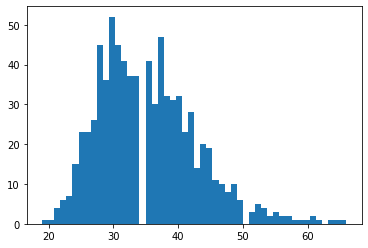

In [76]:
age = np.array(df2.select('age').collect())
plt.hist(age, bins =50)
plt.show()

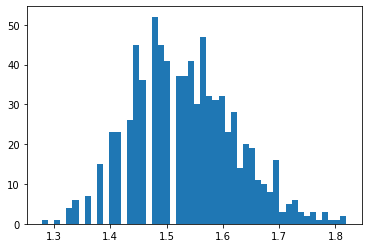

In [77]:
df2 = df2.withColumn("log_age", log10(col("age")))
age = np.array(df2.select('log_age').collect())
plt.hist(age, bins =50)
plt.show()                     
                     

In [78]:
#df2.columns

In [92]:
# Combine all features into one vector named features.
assembler = VectorAssembler(
  inputCols=[
'OHE_country_live',
 'OHE_country_work',
 'OHE_num_employees',
 'OHE_benefits',
 'OHE_care_options',
 'OHE_wellness_program',
 'OHE_seek_help_resources',
 'OHE_anonymity',
 'OHE_leave_difficulty',
 'OHE_phys_vs_mental',
 'OHE_supervisor_willingness',
 'OHE_coworkers_willingness',
 'OHE_prev_benefits',
 'OHE_prev_care_options',
 'OHE_prev_wellness_program',
 'OHE_prev_seek_help_resources',
 'OHE_prev_anonymity',
 'OHE_prev_phys_vs_mental',
 'OHE_prev_supervisor_willingness',
 'prev_supervisor_experience',
 'OHE_prev_coworkers_willingness',
 'prev_coworkers_experience',
 'OHE_mh_family_history',
 'OHE_gender_new',
 'OHE_race_new',
 'OHE_age_bucket',
 'age',
 'mental_health_importance',
 
 'prev_mental_health_importance',

            'coworkers_experience',
            'supervisor_experience'
  ],
outputCol="features_2")

# Let's transform the data. 
output = assembler.transform(df2)

In [93]:
# Train/test split. 
final_data = output.select("features_2",'mh_treatment')
train_data,test_data = final_data.randomSplit([0.8,0.2],18)

In [94]:
# Let's import the relevant classifiers. 
from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier
from pyspark.ml import Pipeline

dtc = DecisionTreeClassifier(labelCol='mh_treatment',featuresCol='features_2')
rfc = RandomForestClassifier(labelCol='mh_treatment',featuresCol='features_2')


In [95]:

dtc_model = dtc.fit(train_data)
rfc_model = rfc.fit(train_data)


dtc_predictions = dtc_model.transform(test_data)
rfc_predictions = rfc_model.transform(test_data)



In [96]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator 

my_binary_eval = BinaryClassificationEvaluator(labelCol = 'mh_treatment')

In [97]:
# This is the area under the curve. This indicates that the data is highly seperable.
print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))

# RFC improves accuracy but also model complexity. RFC outperforms DTC in nearly every situation.
print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))

# We can't repeat these exact steps for GBT. If you print the schema of all three, you may be able to notice why.
# Instead, let's redefine the object:

# Interesting, GBT didn't perform as well as RFC or DTC. But that's because we left the model's settings as default. 
# In most cases, we should adjust these parameters. More trees may increase accuracy, but decrease precision and recall. 


DTC
0.6640155818860575
RFC
0.7239084564194126
GBT
0.6827625385489369


In [ ]:
# This is the area under the curve. This indicates that the data is highly seperable.
print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))

In [98]:
#feature selection:
cols_select = ['OHE_mh_family_history', 'prev_supervisor_experience','coworkers_experience',
              'OHE_care_options', 'supervisor_experience','OHE_gender_new', 'age' ]

# Combine all features into one vector named features.
assembler = VectorAssembler(
  inputCols=cols_select,
outputCol="features_3")

# Let's transform the data. 
output = assembler.transform(df2)

# Train/test split. 
final_data = output.select("features_3",'mh_treatment')
train_data,test_data = final_data.randomSplit([0.8,0.2],18)

rfc = RandomForestClassifier(labelCol='mh_treatment',featuresCol='features_3')



rfc_model = rfc.fit(train_data)


rfc_predictions = rfc_model.transform(test_data)

print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))

RFC
0.8653627657847753


In [100]:
#feature selection:
cols_select = ['OHE_mh_family_history', 'prev_supervisor_experience','coworkers_experience',
              'OHE_care_options', 'supervisor_experience','OHE_gender_new', 'age' ]

# Combine all features into one vector named features.
assembler = VectorAssembler(
  inputCols=cols_select,
outputCol="features_3")

# Let's transform the data. 
output = assembler.transform(df2)

# Train/test split. 
final_data = output.select("features_3",'mh_treatment')
train_data,test_data = final_data.randomSplit([0.75,0.25],18)

rfc =RandomForestClassifier(labelCol='mh_treatment',featuresCol='features_3', maxDepth= 6)



rfc_model = rfc.fit(train_data)


rfc_predictions = rfc_model.transform(test_data)

print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))

RFC
0.8397052966945439


In [101]:
#feature selection:
cols_select = ['OHE_mh_family_history', 'supervisor_experience','coworkers_experience',
              'OHE_care_options', 'supervisor_experience','OHE_gender_new', 'age' ]

# Combine all features into one vector named features.
assembler = VectorAssembler(
  inputCols=cols_select,
outputCol="features_3")

# Let's transform the data. 
output = assembler.transform(df2)

# Train/test split. 
final_data = output.select("features_3",'mh_treatment')
train_data,test_data = final_data.randomSplit([0.8,0.2],18)

rfc =RandomForestClassifier(labelCol='mh_treatment',featuresCol='features_3', maxDepth= 6)



rfc_model = rfc.fit(train_data)


rfc_predictions = rfc_model.transform(test_data)

print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))

RFC
0.7656725990059324


In [102]:
#feature selection:
cols_select = ['OHE_mh_family_history', 'prev_supervisor_experience','coworkers_experience',
              'OHE_care_options', 'supervisor_experience','OHE_gender_new', 'age' ]

# Combine all features into one vector named features.
assembler = VectorAssembler(
  inputCols=cols_select,
outputCol="features_3")

# Let's transform the data. 
output = assembler.transform(df2)

# Train/test split. 
final_data = output.select("features_3",'mh_treatment')
train_data,test_data = final_data.randomSplit([0.8,0.2],18)

rfc = RandomForestClassifier(labelCol='mh_treatment',featuresCol='features_3')



rfc_model = rfc.fit(train_data)


rfc_predictions = rfc_model.transform(test_data)

print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))

RFC
0.8653627657847753


In [103]:
numeric_metadata = output.select("features_3").schema[0].metadata.get('ml_attr').get('attrs').get('numeric')
binary_metadata = output.select("features_3").schema[0].metadata.get('ml_attr').get('attrs').get('binary')

merge_list = numeric_metadata + binary_metadata 

newlist = sorted(merge_list, key=lambda d: d['idx']) 

string = rfc_model.toDebugString

input_cols =[i['name'] for  i in newlist]

for i, feat in reversed(list(enumerate(input_cols))):
    string = string.replace('feature ' + str(i), feat)
print(string)

RandomForestClassificationModel: uid=RandomForestClassifier_fc03fa143d3a, numTrees=20, numClasses=2, numFeatures=12
  Tree 0 (weight 1.0):
    If (supervisor_experience <= 0.5)
     If (OHE_gender_new_male in {0.0})
      If (age <= 49.5)
       If (age <= 34.5)
        Predict: 1.0
       Else (age > 34.5)
        If (OHE_mh_family_history_Yes in {0.0})
         Predict: 0.0
        Else (OHE_mh_family_history_Yes not in {0.0})
         Predict: 1.0
      Else (age > 49.5)
       If (OHE_care_options_No in {1.0})
        Predict: 0.0
       Else (OHE_care_options_No not in {1.0})
        Predict: 1.0
     Else (OHE_gender_new_male not in {0.0})
      If (OHE_care_options_No in {0.0})
       If (prev_supervisor_experience <= 0.5)
        If (OHE_mh_family_history_Yes in {0.0})
         Predict: 0.0
        Else (OHE_mh_family_history_Yes not in {0.0})
         Predict: 1.0
       Else (prev_supervisor_experience > 0.5)
        Predict: 1.0
      Else (OHE_care_options_No not in {0.0})


/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


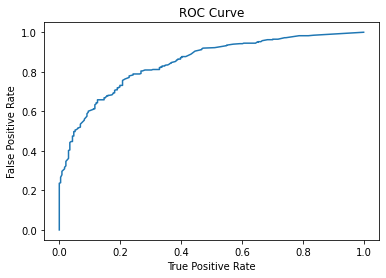

Training set areaUnderROC: 0.8479355652722484


In [104]:
# Returns as a list (false positive rate, true positive rate)
from pyspark.mllib.evaluation import BinaryClassificationMetrics
trainingSummary = rfc_model.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [105]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics, MulticlassMetrics
#select only prediction and label columns
preds_and_labels = rfc_predictions.select(['prediction','mh_treatment'])

metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))

print(metrics.confusionMatrix().toArray())

/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


[[36. 25.]
 [12. 89.]]


In [107]:
#try gradient boosting
gbt = GBTClassifier(labelCol='mh_treatment',featuresCol='features_3')

gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)

my_binary_gbt_eval = BinaryClassificationEvaluator(labelCol='mh_treatment', rawPredictionCol='prediction')
print("GBT")
print(my_binary_gbt_eval.evaluate(gbt_predictions))


GBT
0.7469566628794027


In [109]:
#feature selection:
cols_select = ['OHE_mh_family_history', 'prev_supervisor_experience','coworkers_experience',
              'OHE_care_options', 'supervisor_experience','OHE_gender_new', 'age' ]

# Combine all features into one vector named features.
assembler = VectorAssembler(
  inputCols=cols_select,
outputCol="features_3")

# Let's transform the data. 
output = assembler.transform(df2)

# Train/test split. 
final_data = output.select("features_3",'mh_treatment')
train_data,test_data = final_data.randomSplit([0.8,0.2],18)

rfc = RandomForestClassifier(labelCol='mh_treatment',featuresCol='features_3', maxDepth= 6)



rfc_model = rfc.fit(train_data)


rfc_predictions = rfc_model.transform(test_data)

print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))

RFC
0.8630092517448467


In [132]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

rfc = RandomForestClassifier(labelCol='mh_treatment',featuresCol='features_3', maxDepth= 6)
stages = []
stages += [rfc]

parameters = {"maxDepth" : [3, 5, 6, 7, 8,10, 15], "maxBins" : [6, 12, 24, 32], "numTrees" : [3, 5, 10,15,20]}

paramGrid = ParamGridBuilder()

for key, value in parameters.items():
    paramGrid.addGrid(rfc.getParam(key), value)
estimatorParamMaps = (paramGrid.build())

pipeline = Pipeline(stages=stages)

crossValidator = CrossValidator(estimator=pipeline, estimatorParamMaps=estimatorParamMaps, evaluator=MulticlassClassificationEvaluator(labelCol='mh_treatment', predictionCol='prediction', metricName='f1'), numFolds=3)

pipelineModel = crossValidator.fit(train_data)

predictions = pipelineModel.transform(test_data)


In [133]:
pipelineModel.getEstimatorParamMaps()[ np.argmax(pipelineModel.avgMetrics) ]

{Param(parent='RandomForestClassifier_6ecd79823184', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes. Must be in range [0, 30].'): 7,
 Param(parent='RandomForestClassifier_6ecd79823184', name='maxBins', doc='Max number of bins for discretizing continuous features.  Must be >=2 and >= number of categories for any categorical feature.'): 32,
 Param(parent='RandomForestClassifier_6ecd79823184', name='numTrees', doc='Number of trees to train (>= 1).'): 10}

In [161]:
#feature selection:
cols_select = ['OHE_mh_family_history', 'prev_supervisor_experience','coworkers_experience',
              'OHE_care_options', 'supervisor_experience','OHE_gender_new', 'age' ]

# Combine all features into one vector named features.
assembler = VectorAssembler(
  inputCols=cols_select,
outputCol="features_3")

# Let's transform the data. 
output = assembler.transform(df2)

# Train/test split. 
final_data = output.select("features_3",'mh_treatment')
train_data,test_data = final_data.randomSplit([0.8,0.2],18)

rfc = RandomForestClassifier(labelCol='mh_treatment',featuresCol='features_3', maxDepth= 6,maxBins=32, numTrees = 20)



rfc_model = rfc.fit(train_data)


rfc_predictions = rfc_model.transform(test_data)

print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))

RFC
0.8630092517448467
